This script visualizes patient demographics and comorbidity patterns using UMAP.

Key steps:
1. **Load analysis datasets**:
   - Load K-means clustering results and UMAP embeddings.
   - **Input:** `'Data/kmeans_clusters_n5_rdm42_diagnosis.pkl'`, `'Data/umap_embedding_diagnosis.pkl'`, `'Data/umap_model_diagnosis.joblib'`.

2. **Generate UMAP visualizations**:
   - Create three scatter plots to explore different patient characteristics:
     - **Cluster assignment**: Color-coded by K-means cluster.
     - **Sex distribution**: Distinguishes male and female patients.
     - **Number of diagnoses**: Uses a viridis colormap to indicate disease burden.

In [1]:
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import umap
import joblib
import pickle
from joblib import dump
from joblib import load
from matplotlib.colors import Normalize

In [2]:
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

# Load analysis datasets

In [3]:
with open('Data/kmeans_clusters_n5_rdm42_diagnosis.pkl', 'rb') as f:
    df = pickle.load(f)

In [4]:
with open('Data/umap_embedding_diagnosis.pkl', 'rb') as file:
    X_embedded = pickle.load(file)

In [5]:
loaded_umap_model = load('Data/umap_model_diagnosis.joblib')

Mon Feb 24 16:16:22 2025 Building and compiling search function


## UMAP Visualization - Patient Demographics

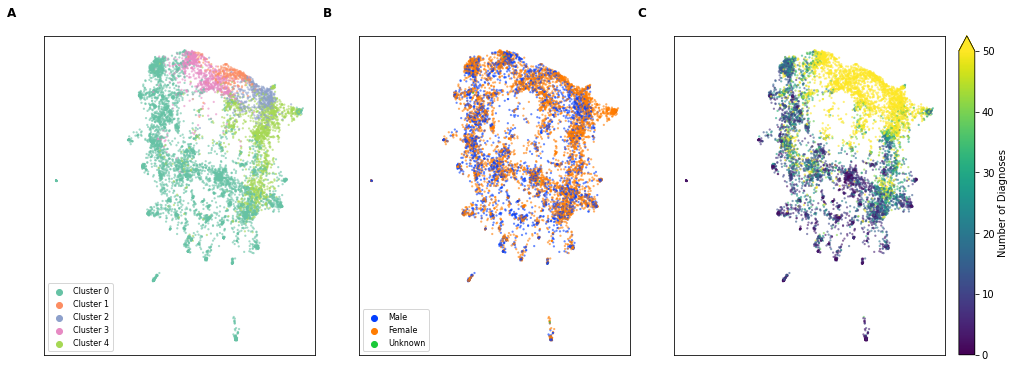

In [6]:
# Set random seed
np.random.seed(1)
reordered_indices = np.arange(X_embedded.shape[0])
np.random.shuffle(reordered_indices)

# Specify figure size (Width: 14 inches × Height: 5 inches)
fig, axes = plt.subplots(1, 3, figsize=(14, 5), constrained_layout=True)

# Information for each plot
plot_info = [
    {"labels": df["Cluster"], "palette": "Set2", "label": "A"},
    {"labels": df["Sex"].replace({"*Unspecified": "Unknown"}), "palette": "bright", "label": "B"},
    {"labels": df["#diagnosis"], "palette": "viridis", "label": "C", "use_colorbar": True}
]

# Create three plots
for i, ax in enumerate(axes):
    labels = plot_info[i]["labels"][reordered_indices]
    palette = plot_info[i]["palette"]
    
    if "use_colorbar" in plot_info[i]:  # Viridis color bar
        norm = Normalize(vmin=0, vmax=50)  # Normalize values
        scatter = sns.scatterplot(
            x=X_embedded[reordered_indices, 0],
            y=X_embedded[reordered_indices, 1],
            hue=labels,
            s=5,
            linewidth=0,
            alpha=0.6,
            palette=palette,
            hue_norm=norm,
            legend=False,
            ax=ax
        )
        sm = plt.cm.ScalarMappable(cmap="viridis", norm=norm)
        sm.set_array([])
        plt.colorbar(sm, label='Number of Diagnoses', extend="max")
    else:  # Clusters & Sex
        sns.scatterplot(
            x=X_embedded[reordered_indices, 0],
            y=X_embedded[reordered_indices, 1],
            hue=labels,
            s=5,
            linewidth=0,
            alpha=0.6,
            palette=palette,
            ax=ax
        )
        handles, legend_labels = ax.get_legend_handles_labels()
        if i == 0:  # Customize labels for Cluster plot
            legend_labels = [f"Cluster {label}" for label in legend_labels]
        ax.legend(handles=handles, labels=legend_labels, title="", loc="lower left", fontsize=8)

    ax.set(xticks=[], yticks=[], facecolor="white", title="")  # Remove axis ticks and title

    # **Add labels (A, B, C) outside the upper-left corner of each plot**
    ax.text(-0.1, 1.05, plot_info[i]["label"], transform=ax.transAxes, 
            fontsize=12, fontweight="bold", ha="right", va="bottom")

# Save the figure
plt.savefig("Figures/UMAP_Demographics.pdf", dpi=600, format="pdf", bbox_inches="tight")
plt.show()
